In [362]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


In [363]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1,
)

In [364]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


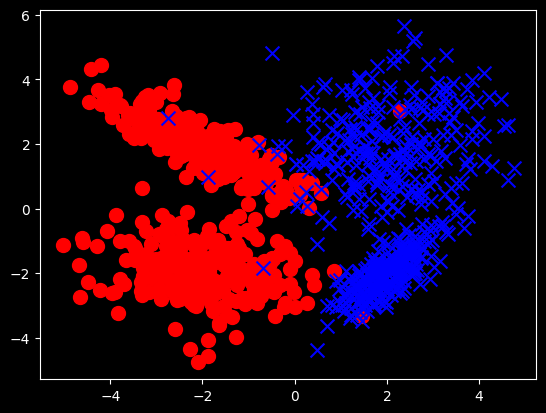

In [365]:
plt.scatter(*X[y == 0].T, marker="o", c="r", s=100)
plt.scatter(*X[y == 1].T, marker="x", c="b", s=100)
plt.show()

In [366]:
class SGD:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.errors = []

    def __gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def _grad_func(self, *args):
        ...

    def __optimize(self, X, y, start_b, n_iters):
        self.b = start_b.copy()
        self.errors = []
        for _ in range(n_iters):
            b_grad = self._grad_func(X, y, self.b)
            self.b = self.__gradient_step(self.b, b_grad)
            self.errors.append(((self.predict(X, True) - y) ** 2).mean())

    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.__optimize(X, y, start_b, self._n_iters)

In [367]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1.0 / (1.0 + np.exp(-X.dot(b)))

    def _grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1.0 / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X, ones=False):
        if not ones:
            X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)

    def predict(self, X, ones=False):
        if not ones:
            X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = self.predict_proba(X, True) > 0.5
        return y_pred

In [368]:
logreg = LogReg()

In [369]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [370]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.98 F1-score = 0.98


In [371]:
y_pred_proba = logreg.predict_proba(X)

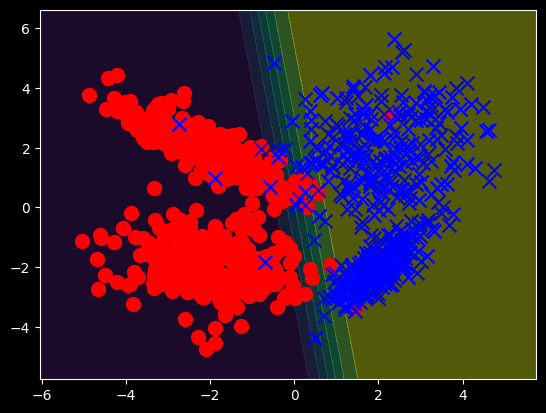

In [372]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0] - 1, X.max(axis=0)[0] + 1, 0.01),
    np.arange(X.min(axis=0)[1] - 1, X.max(axis=0)[1] + 1, 0.01),
)
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(*X[y == 0].T, marker="o", c="r", s=100)
plt.scatter(*X[y == 1].T, marker="x", c="b", s=100)

In [373]:
model = LogisticRegression()

In [374]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [375]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.98 F1-score = 0.98


В результате модели имеют одинаковую точность

---
1) Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [376]:
model.coef_

array([[3.11346877, 0.39898891]])

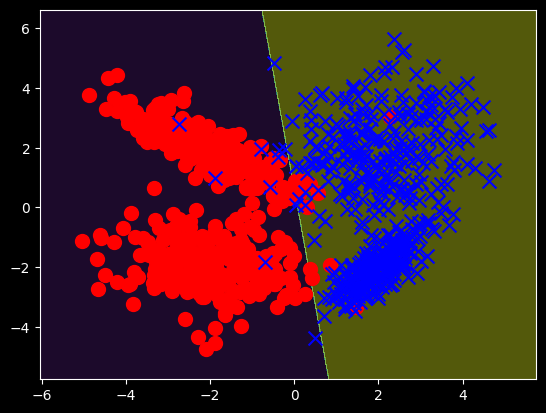

In [377]:
Z = model.predict(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(*X[y == 0].T, marker="o", c="r", s=100)
plt.scatter(*X[y == 1].T, marker="x", c="b", s=100)

---
2) Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


accuracy = 0.98 F1-score = 0.98


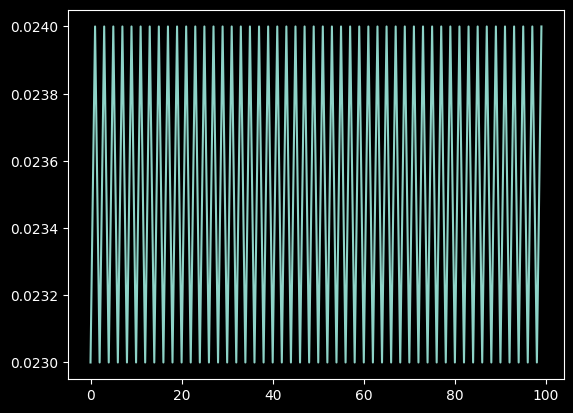

In [378]:
logreg = LogReg(alpha=25)
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
plt.plot(np.array(logreg.errors[-100:]))
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

При скорости обучении 25 градиентный спуск расходится

---
3) Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

✅Готово

---
4) Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения.
Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

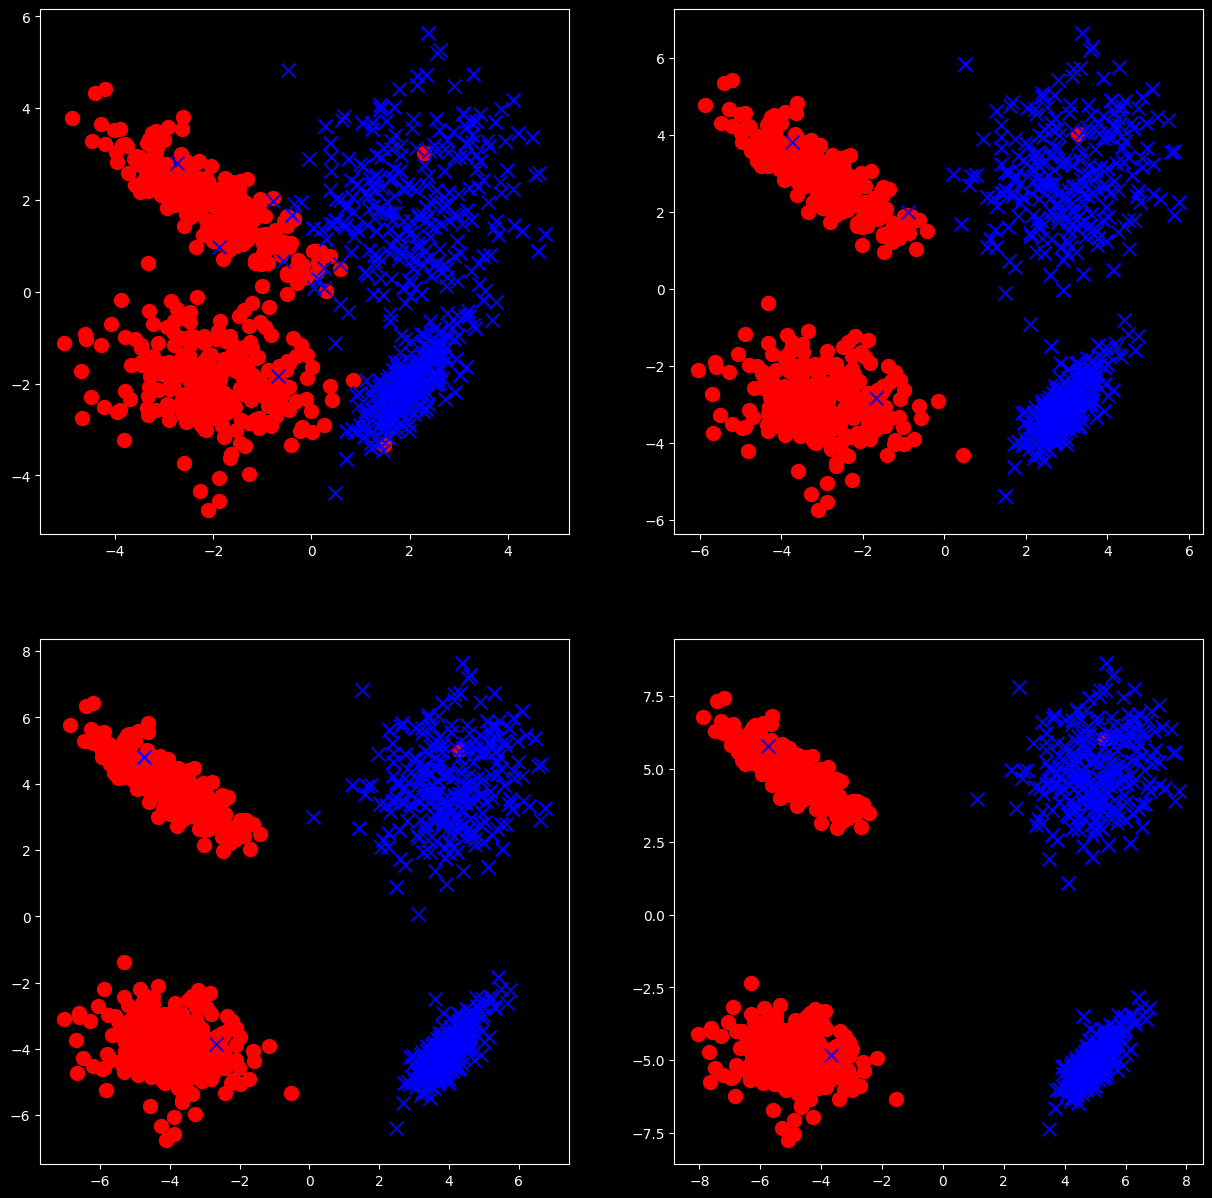

In [379]:
figure, axes = plt.subplots(2, 2)
figure.set_figheight(15)
figure.set_figwidth(15)

for i in range(2, 6):
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=i,
        random_state=1,
    )
    axes.ravel()[i - 2].scatter(
        X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c="r", s=100
    )
    axes.ravel()[i - 2].scatter(
        X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c="b", s=100
    )
plt.show()

Чем больше `class_sep`, тем больше свободного пространства между классами, и тем точнее будет работать модель

---
5) Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

accuracy = 0.99 F1-score = 0.99


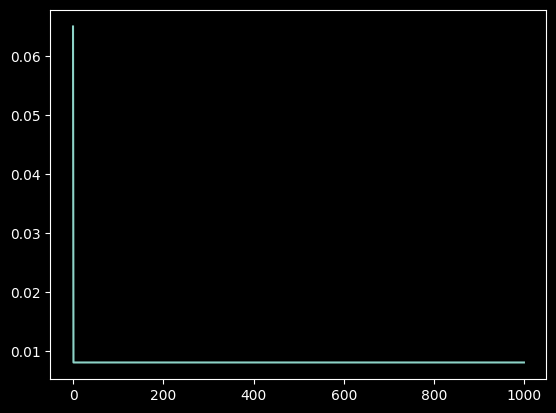

In [380]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    n_classes=2,
    class_sep=5,
    random_state=1,
)
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
plt.plot(np.array(logreg.errors))
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

При наличии 10-и признаков все прекрасно сходится

---
6) Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех".\
Решите задачу множественной классификации средствами sklearn.

In [381]:
# Упрощенная вариация
class MultiLogRegSimple:
    def __init__(self, alpha=0.5, n_iters=1000):
        self._alpha = alpha
        self._n_iters = n_iters

    def fit(self, X, y):
        # Создаем список всех моделей
        self.models = []
        # Проходим по всем возможным классам
        for i in np.unique(y)[:-1]:
            # Создаем модель регрессии
            self.models.append(LogReg(self._alpha, self._n_iters))
            # Создаем новые Y, которые True - нужный нам класс, False - остальные
            _y = y.copy()
            _y[y == i] = True
            _y[y != i] = False
            # Обучаем модель
            self.models[-1].fit(X, _y)
            # Теперь у нас есть модель, которая умеет предсказывать отностия ли объект к конкретному классу

    def predict(self, X):
        # Создаем результат предсказаний
        # По умолчанию задаем, что это последний из возможных классов
        y = np.full(len(X), len(self.models))
        # С помощью каждой модели предсказываем класс
        for n, model in enumerate(self.models):
            y[model.predict(X)] = n
        return y

In [382]:
class MultiLogReg:
    def __init__(self, alpha=0.5, n_iters=1000):
        self._alpha = alpha
        self._n_iters = n_iters

    def fit(self, X, y):
        # Создаем список всех моделей
        self.models = []
        # Проходим по всем возможным классам
        for i in np.unique(y):
            # Создаем модель регрессии
            self.models.append(LogReg(self._alpha, self._n_iters))
            # Создаем новые Y, которые True - нужный нам класс, False - остальные
            _y = y.copy()
            _y[y == i] = True
            _y[y != i] = False
            # Обучаем модель
            self.models[-1].fit(X, _y)
            # Теперь у нас есть модель, которая умеет предсказывать отностия ли объект к конкретному классу

    def predict_proba(self, X):
        preds = []
        # С помощью каждой модели предсказываем класс
        for model in self.models:
            preds.append(model.predict_proba(X))

        preds = np.array(preds).T
        return preds

    def predict(self, X):
        # Создаем результат предсказаний
        # По умолчанию задаем, что это последний из возможных классов
        y = np.zeros(len(X), int)
        # Предсказываем вероятность принадлежности
        preds = self.predict_proba(X).T
        # Берем класс к которому с наибольше вероятностью принадлежит объект
        mask = np.where(preds.max(axis=0) == preds)
        y[mask[1]] = mask[0]
        return y

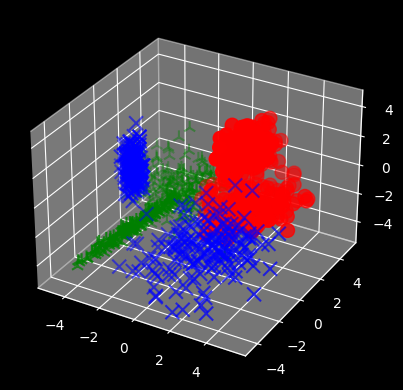

In [383]:
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    class_sep=2,
    random_state=1,
)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*X[y == 0].T, marker="o", c="r", s=100)
ax.scatter(*X[y == 1].T, marker="2", c="g", s=100)
ax.scatter(*X[y == 2].T, marker="x", c="b", s=100)

In [384]:
mulogreg = MultiLogReg()
mulogreg.fit(X, y)
y_pred = mulogreg.predict(X)

ac = accuracy_score(y, y_pred)
print(f"accuracy = {ac:.2f}")

accuracy = 0.93


---
7) Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [385]:
# Создадим и обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Получим вероятности принадлежности к каждому классу для тестового набора данных
proba_predictions = model.predict_proba(X)

# Выведем вероятности для первых нескольких объектов тестового набора
print("Вероятности для первых нескольких объектов:")
print(proba_predictions[:5])

Вероятности для первых нескольких объектов:
[[9.96164198e-01 2.10330500e-03 1.73249711e-03]
 [2.72940510e-03 7.76752592e-01 2.20518003e-01]
 [9.99861013e-01 1.35298776e-04 3.68794190e-06]
 [1.95790770e-05 1.16612923e-03 9.98814292e-01]
 [9.99872340e-01 1.21810368e-04 5.84946134e-06]]
